In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
df = pd.read_json("/Users/christoskallaras/code/personal/claimer_detection/annotation/annotated_dataset_clean.json")

In [12]:
df.head(5)

,title,domain,text,clean_text,question,answer,answer_start
0,The Centers for Disease Control and Prevention...,Health,__TITLE__\n\nThe Centers for Disease Control a...,The Centers for Disease Control and Prevention...,Who said that To address this critical and wor...,a team of researchers,557.0
1,An oral supplement intended to stimulate a nat...,"Food (Nutrition,Diet)",__TITLE__\n\nAn oral supplement intended to st...,An oral supplement intended to stimulate a nat...,Who said that New research suggests that the s...,"David Marcinek, lead author, professor of radi...",739.0
2,An international team led by uOttawa Faculty o...,"Food (Nutrition,Diet)",__TITLE__\n\nAn international team led by uOtt...,An international team led by uOttawa Faculty o...,Who said that Our publication shows that if yo...,Author,0.0
3,High sitting time during the COVID-19 pandemic...,Health,__TITLE__\n\nHigh sitting time during the COVI...,High sitting time during the COVID-19 pandemic...,Who said that High sitting time during the COV...,Author,0.0
4,Our gut is inhabited by a diverse community of...,"Food (Nutrition,Diet)",__TITLE__\n\nOur gut is inhabited by a diverse...,Our gut is inhabited by a diverse community of...,"Who said that Taken together, these findings e...","Karina Xavier, Leader, IGC Group Responsible f...",3941.0


In [13]:
def show_hist_for_col(df, column, title):
    """
    Display a histogram for a column in a dataframe, splitting the data by domain.
    """
    plt.figure(figsize=(16,8))
    df[df.domain == 'Health'][column].hist(label='Health')
    df[df.domain == 'Food (Nutrition,Diet)'][column].hist(alpha=0.4, label='Food (Nutrition,Diet)')
    plt.title(title)
    plt.legend()
    plt.show()

In [14]:
df['title_len'] = df.title.apply(len)

In [15]:
df['text_len'] = df.text.apply(len)

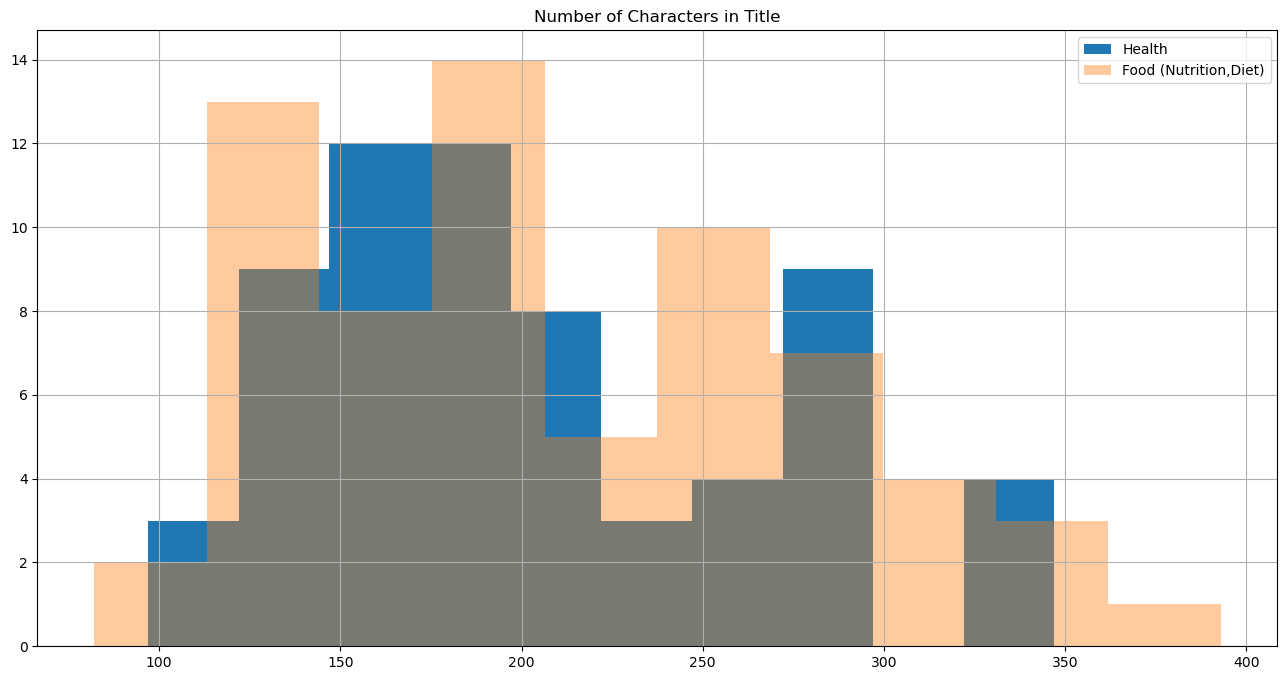

In [16]:
show_hist_for_col(df, 'title_len', 'Number of Characters in Title')

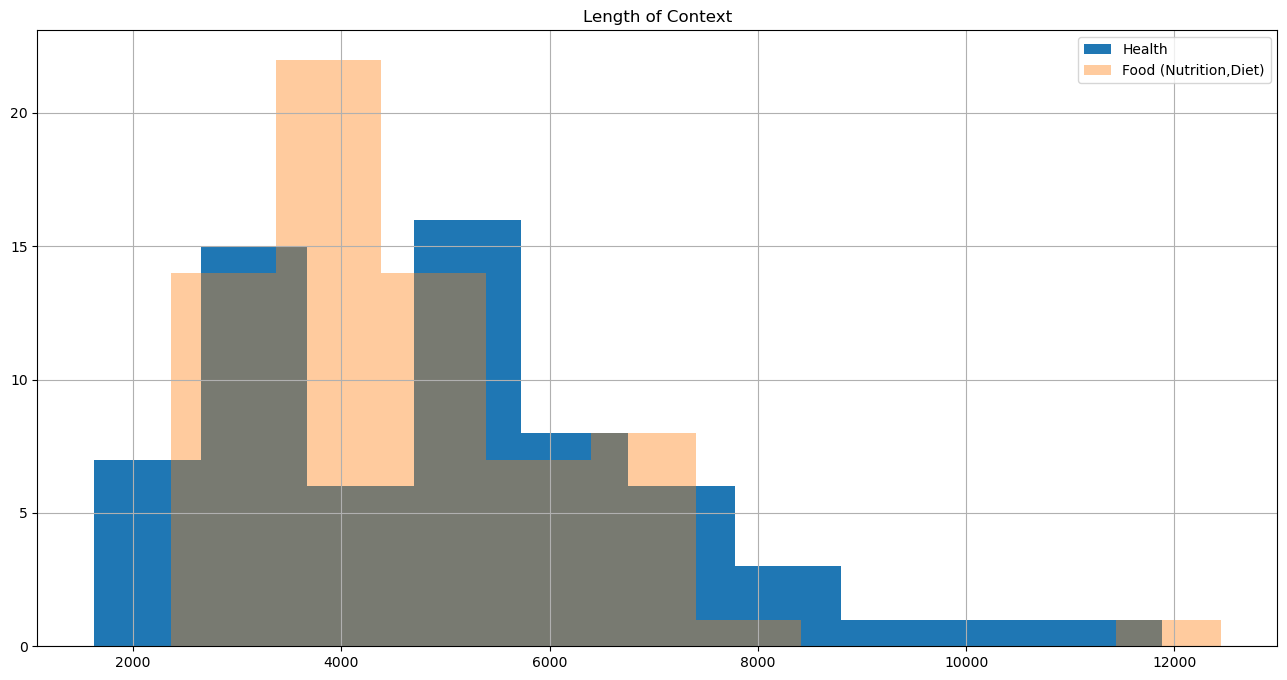

In [17]:
show_hist_for_col(df, 'text_len', 'Length of Context')

<AxesSubplot:xlabel='domain', ylabel='count'>

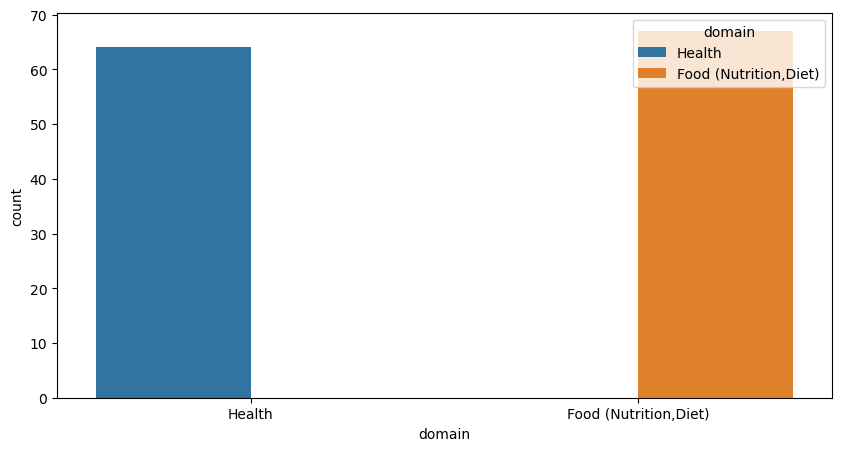

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x= "domain", hue = "domain", data=df)

In [26]:
# Data cleaning
df.dropna(inplace=True)

In [20]:
import spacy
# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

In [27]:
# Function to extract entities from a text
def get_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append(ent.label_)
    return entities

# Apply the function to extract entities from the answers
df['answer_entities'] = df['answer'].apply(get_entities)

# Apply the function to extract entities from the questions
df['question_entities'] = df['question'].apply(get_entities)

# Count the number of entities in each answer
df['answer_entity_count'] = df['answer_entities'].apply(len)

# Count the number of entities in each question
df['question_entity_count'] = df['question_entities'].apply(len)

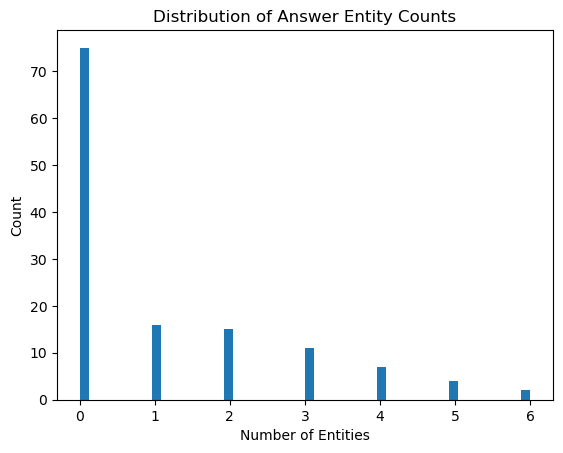

In [28]:
# Plot the distribution of answer entity counts
plt.hist(df['answer_entity_count'], bins=50)
plt.xlabel('Number of Entities')
plt.ylabel('Count')
plt.title('Distribution of Answer Entity Counts')
plt.show()

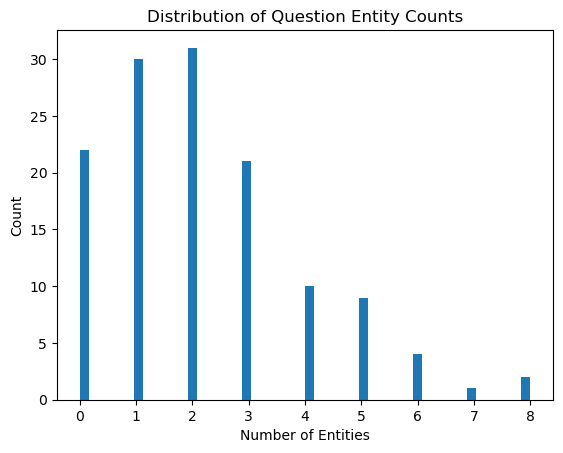

In [29]:
# Plot the distribution of question entity counts
plt.hist(df['question_entity_count'], bins=50)
plt.xlabel('Number of Entities')
plt.ylabel('Count')
plt.title('Distribution of Question Entity Counts')
plt.show()

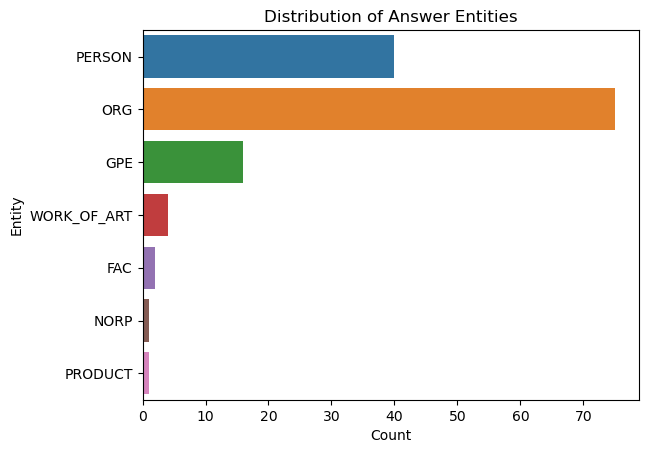

In [30]:
# Plot the distribution of answer entities
sns.countplot(y=df['answer_entities'].explode().reset_index(drop=True))
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Answer Entities')
plt.show()

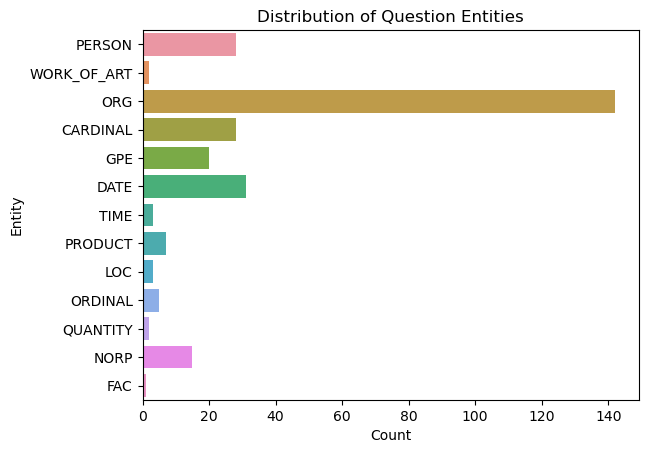

In [31]:
# Plot the distribution of question entities
sns.countplot(y=df['question_entities'].explode().reset_index(drop=True))
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Question Entities')
plt.show()

In [32]:
# Wordclouds
from wordcloud import WordCloud
from gensim.parsing.preprocessing import STOPWORDS

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(text)
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()

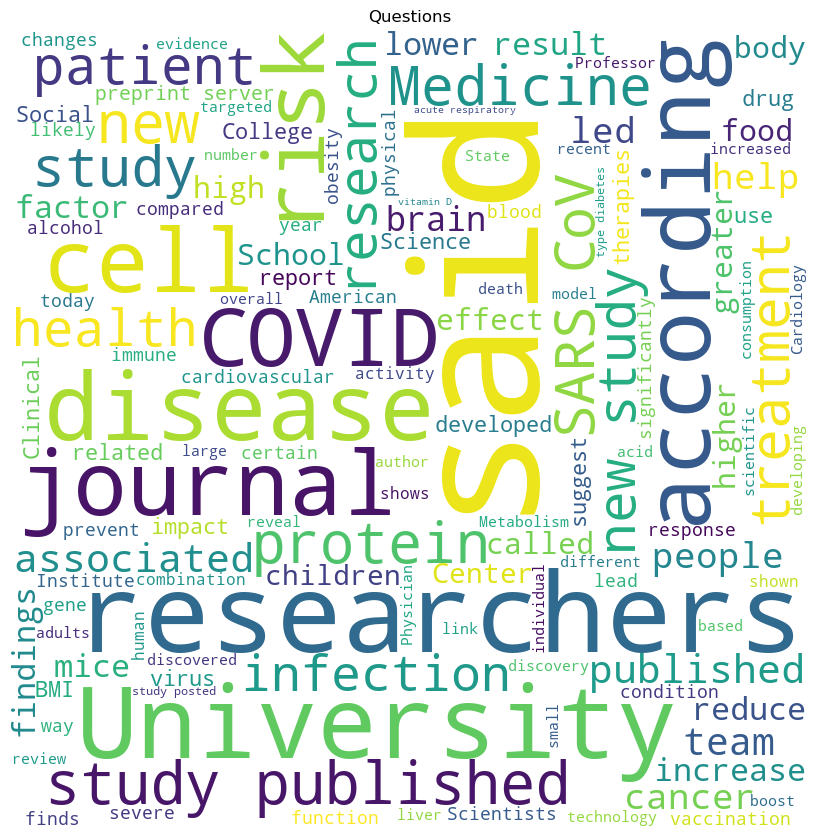

In [33]:
# Plot wordclouds for questions, answers, contexts, and titles
questions = " ".join(df['question'].tolist())
plot_wordcloud(questions, "Questions")

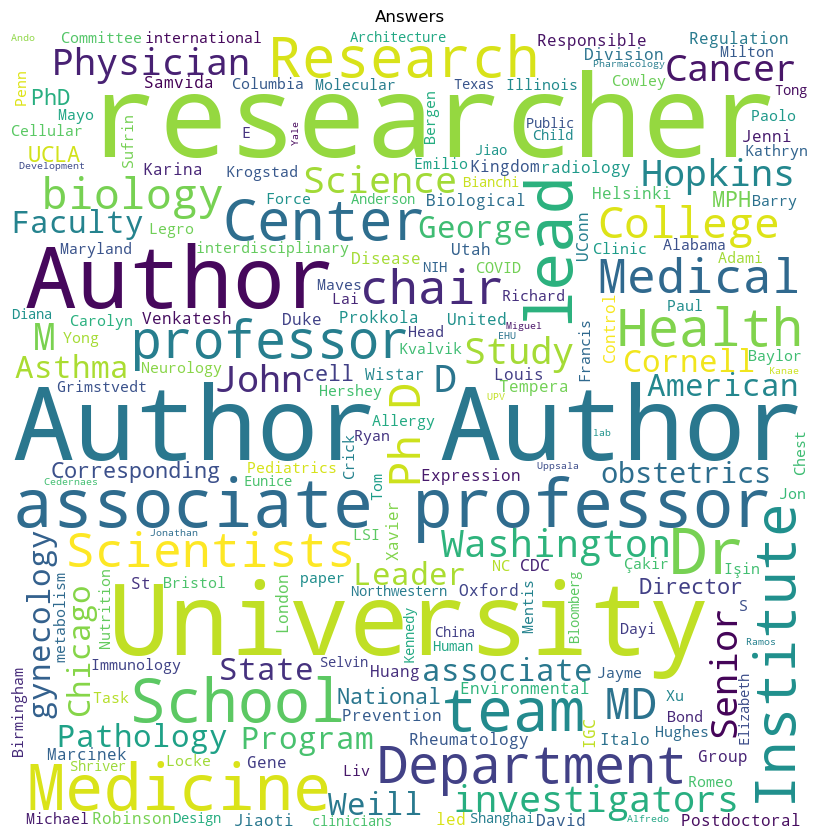

In [34]:
answers = " ".join(df['answer'].tolist())
plot_wordcloud(answers, "Answers")

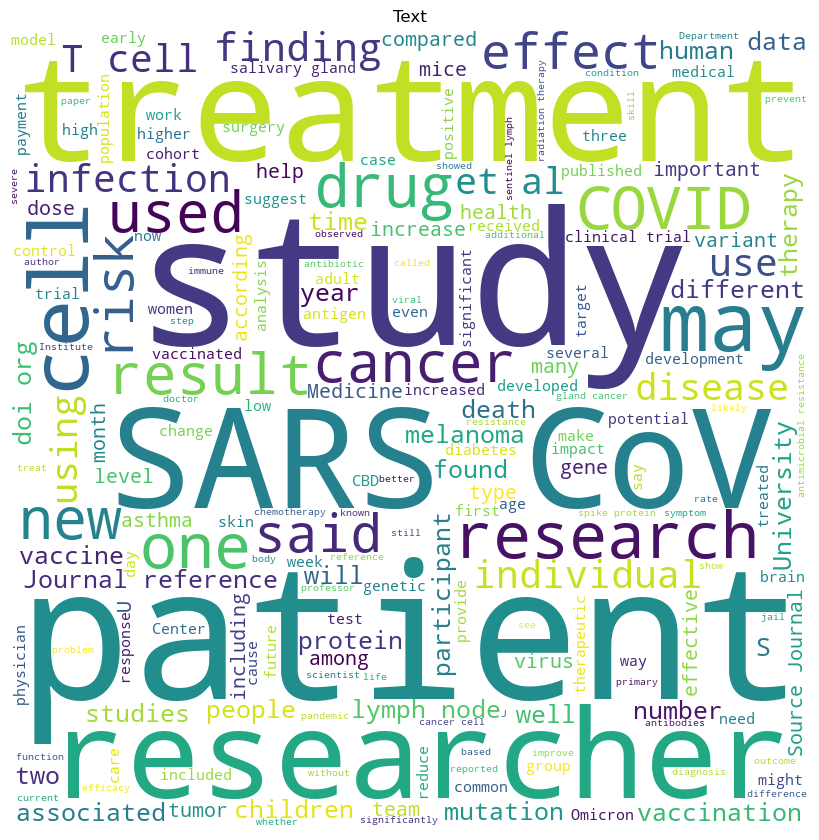

In [49]:
# Plot wordclouds for questions, answers, contexts, and titles
health_text = " ".join((df[df.domain=='Health'].clean_text).tolist())
plot_wordcloud(health_text, "Text")

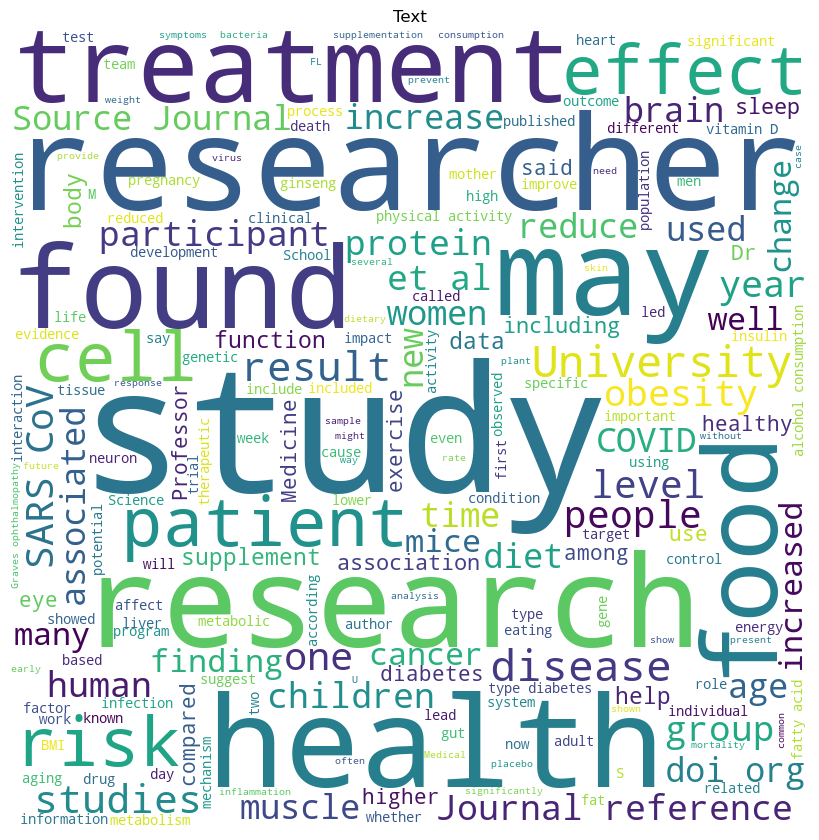

In [48]:
# Plot wordclouds for questions, answers, contexts, and titles
health_text = " ".join((df[df.domain=='Food (Nutrition,Diet)'].clean_text).tolist())
plot_wordcloud(health_text, "Text")

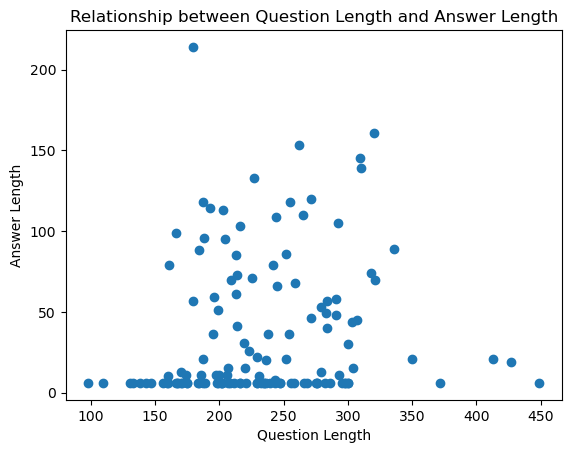

In [35]:
# Scatter plots
# Plot the relationship between the length of the question and the length of the answer
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

plt.scatter(df['question_length'], df['answer_length'])
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Relationship between Question Length and Answer Length')
plt.show()

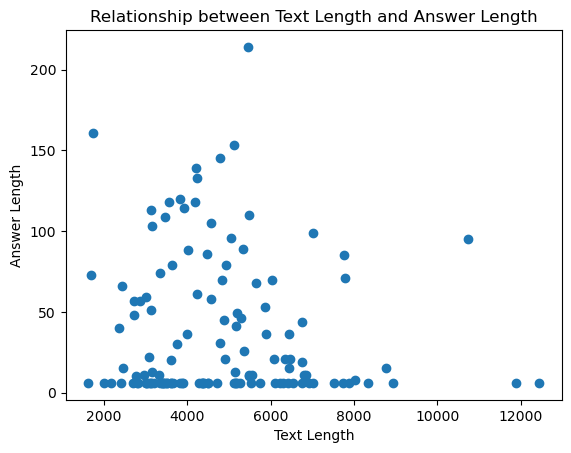

In [37]:
# Heatmaps
# Plot the relationship between the length of the context and the length of the answer
df['text_length'] = df['text'].apply(len)

plt.scatter(df['text_length'], df['answer_length'])
plt.xlabel('Text Length')
plt.ylabel('Answer Length')
plt.title('Relationship between Text Length and Answer Length')
plt.show()

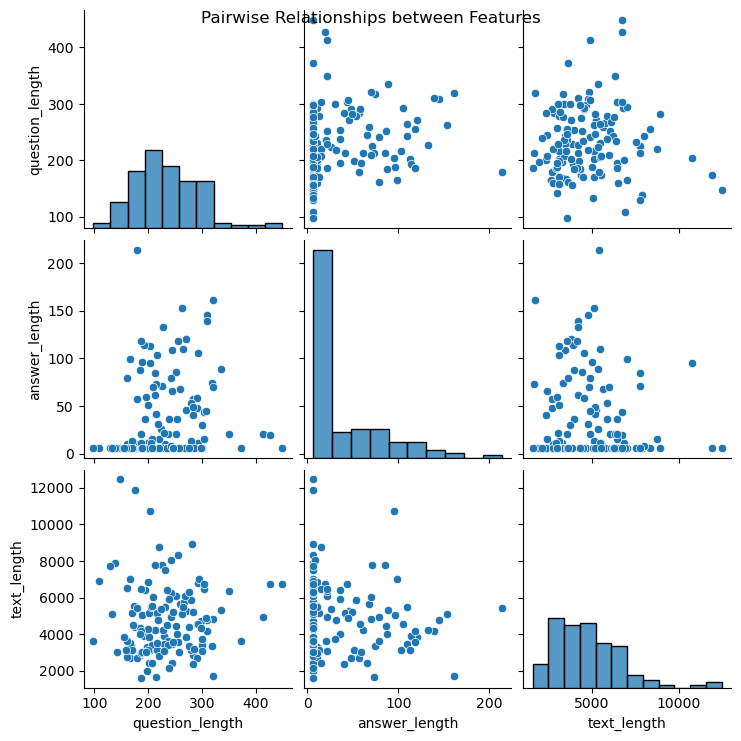

In [38]:
# Pair plots
# Plot the relationship between different features in the dataset
sns.pairplot(df[['question_length', 'answer_length', 'text_length']])
plt.suptitle("Pairwise Relationships between Features")
plt.show()

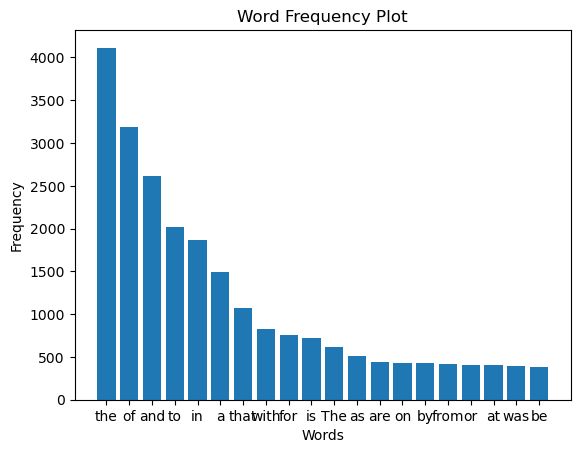

In [39]:
# 1. Word frequency plot
from collections import Counter
words = ' '.join(df['text'])
common_words = dict(Counter(words.split()).most_common(20))
plt.bar(common_words.keys(), common_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Plot')
plt.show()


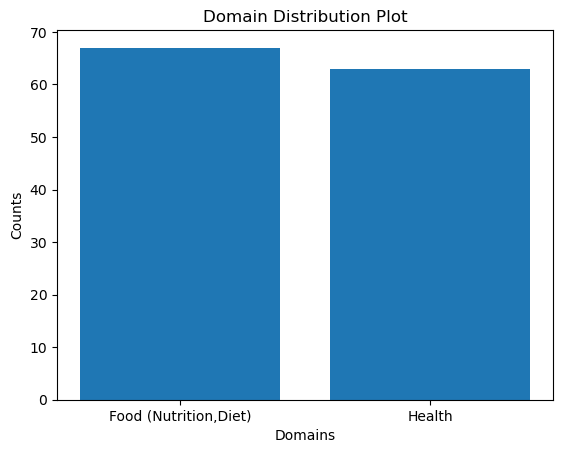

In [40]:
# 2. Domain distribution plot
domain_counts = df['domain'].value_counts()
plt.bar(domain_counts.index, domain_counts.values)
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.title('Domain Distribution Plot')
plt.show()

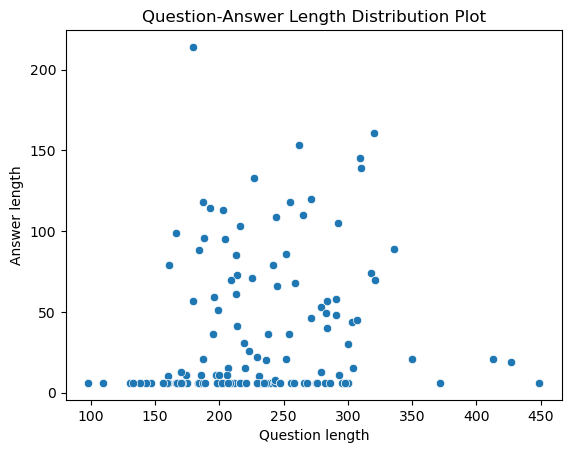

In [41]:
# 3. Question-answer length distribution plot
df['q_len'] = df['question'].apply(lambda x: len(x))
df['a_len'] = df['answer'].apply(lambda x: len(x))
sns.scatterplot(x='q_len', y='a_len', data=df)
plt.xlabel('Question length')
plt.ylabel('Answer length')
plt.title('Question-Answer Length Distribution Plot')
plt.show()

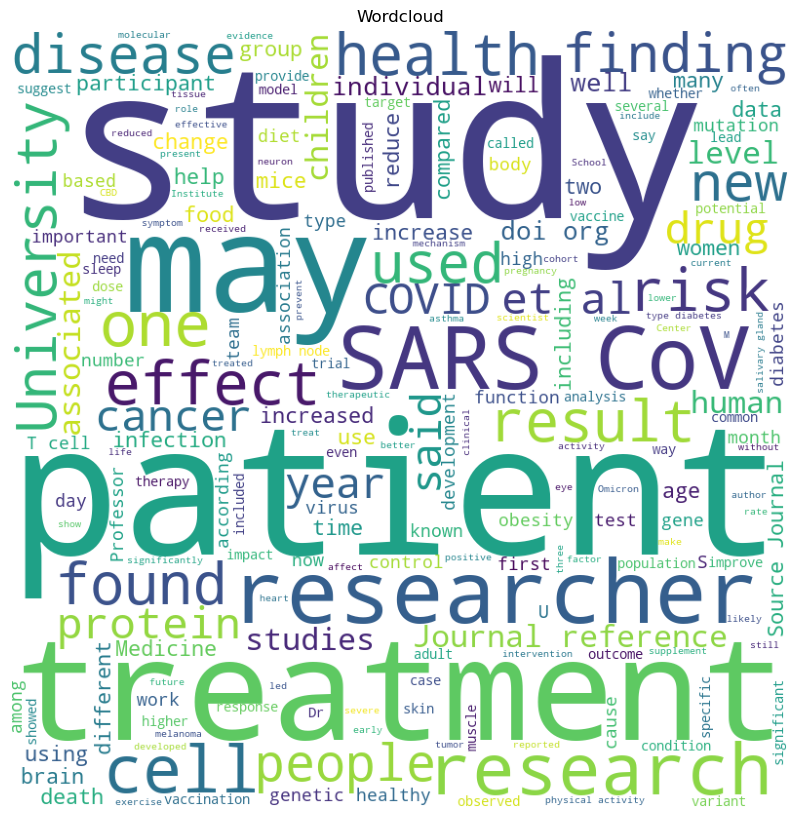

In [46]:
# 5. Wordcloud
words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title('Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

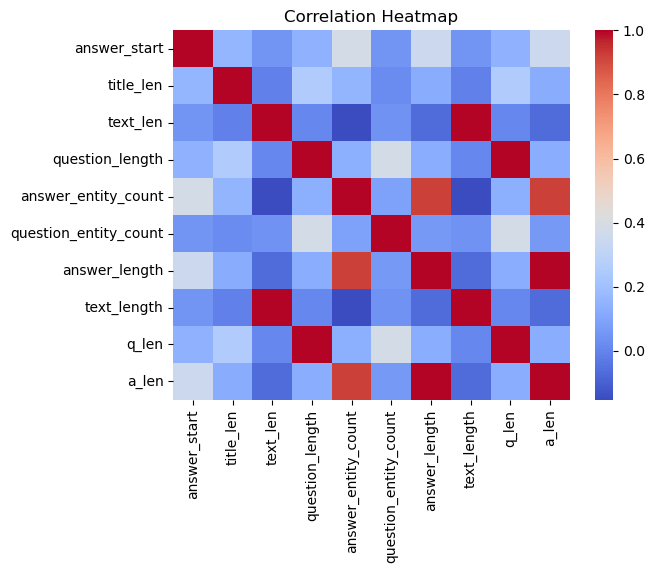

In [42]:
# 6. Correlation heatmap
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

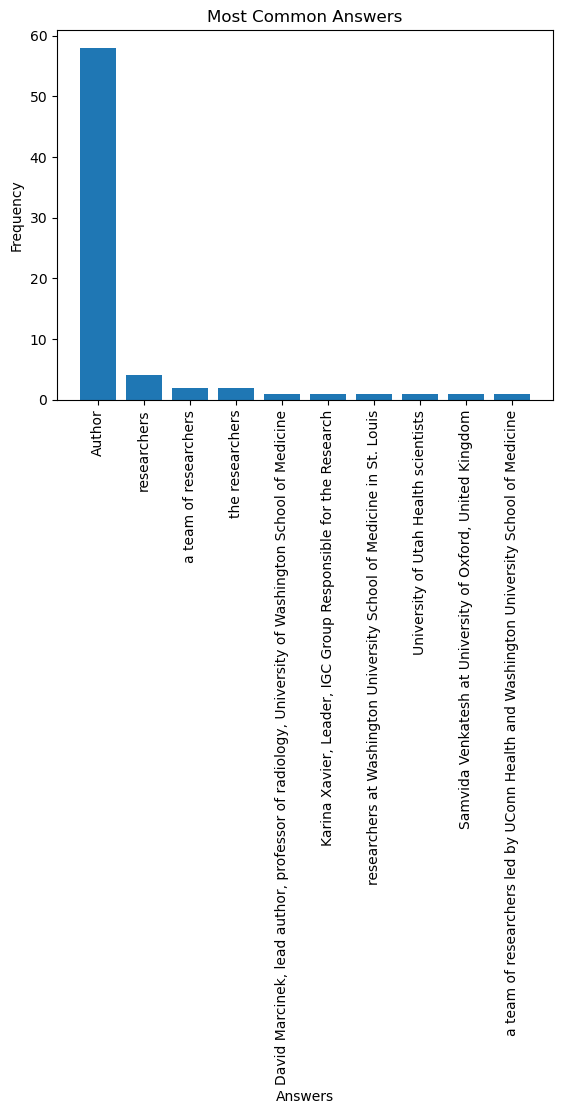

<Figure size 1200x800 with 0 Axes>

In [43]:
from collections import Counter
answers = df['answer']
common_answers = dict(Counter(answers).most_common(10))
plt.bar(common_answers.keys(), common_answers.values())
plt.xlabel('Answers')
plt.ylabel('Frequency')
plt.title('Most Common Answers')
plt.xticks(rotation=90)
plt.figure(figsize=(12, 8))
plt.show()